Question1

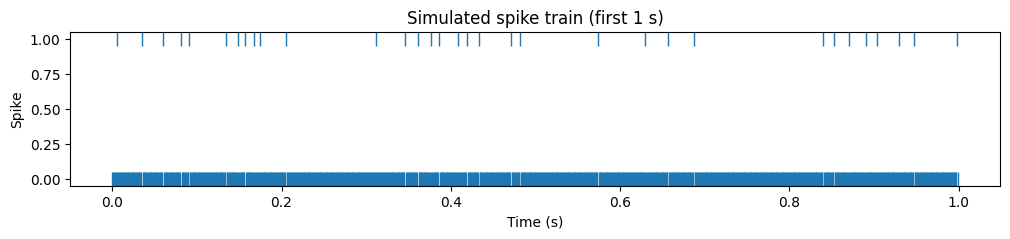

In [57]:
import numpy as np
import matplotlib.pyplot as plt

r0    = 55
dt    = 0.001
n_bin = int(90 / dt)

rate   = np.ones(n_bin) * r0
spikes = np.zeros(n_bin)
t = 0

while t < n_bin:
    p = rate[t] * dt
    if np.random.rand() < p:
        spikes[t] = 1
        # Absolute refractory (next 5 ms): zero the rate
        end_abs = min(t + 6, n_bin)
        rate[t+1 : end_abs] = 0
        # Linear recovery (t+6 through t+11)
        for i in range(6):
            idx = t + 6 + i
            if idx < n_bin:
                rate[idx] = r0 * (i + 1) / 6
    # move forward one ms so each bin uses its correct rate
    t += 1

time = np.arange(n_bin) * dt
plt.figure(figsize=(12,2))
plt.plot(time[:1000], spikes[:1000], '|', markersize=10)
plt.xlabel('Time (s)')
plt.ylabel('Spike')
plt.title('Simulated spike train (first 1 s)')
plt.show()


Question 1 a
TIH -Time interval histogram.

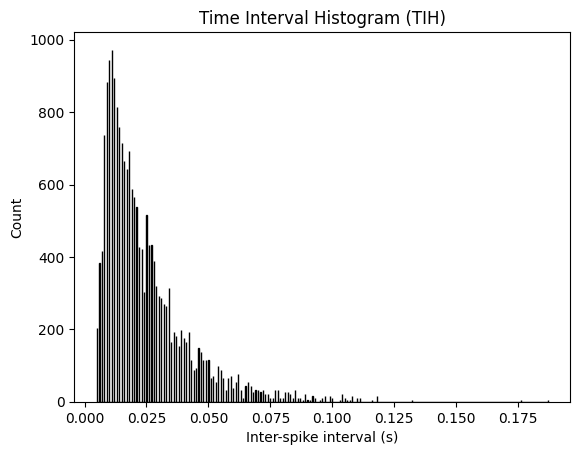

In [60]:
spike_times = np.where(spikes_train == 1)[0] #times of spikes
isi=np.diff(spike_times)*bin_size #isi in ms
plt.hist(isi,bins=len(isi), edgecolor='black',density=True)
plt.xlabel("Inter-spike interval (s)")
plt.ylabel("Count")
plt.title("Time Interval Histogram (TIH)")
plt.show()


Question 1 b
Survivor function
It gives the probability that the inter-spike interval (ISI) is greater than t In words: "What's the chance the next spike hasn't happened yet by time t

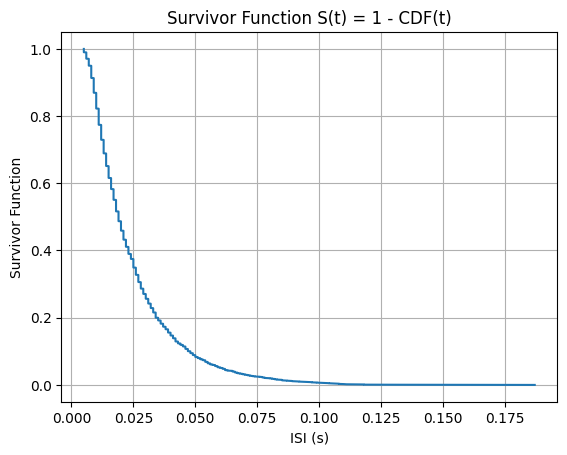

In [ ]:
sorted_isis = np.sort(isi)
CDF=np.arange(1, len(sorted_isis)+1) / len(sorted_isis) 
#survivor function
survivor = 1 - CDF
plt.plot(sorted_isis, survivor)
plt.xlabel("ISI (s)")
plt.ylabel("Survivor Function")
plt.title("Survivor Function S(t) = 1 - CDF(t)")
plt.grid(True)
plt.show()


Question 1 c
Hazard function = TIH/survivor

C:\Users\USER\AppData\Local\Temp\ipykernel_6040\187036404.py:1: RuntimeWarning: divide by zero encountered in divide
  hazard = isi / survivor


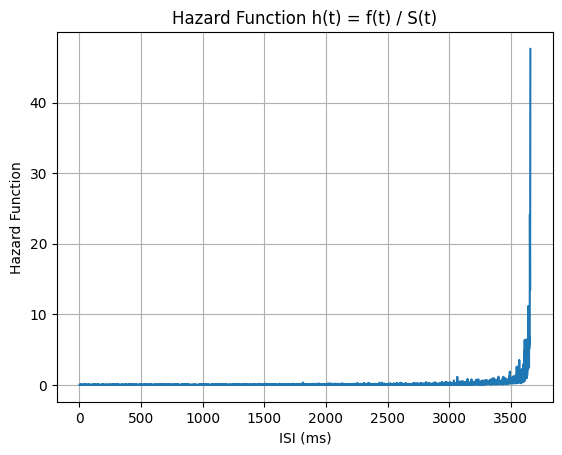

In [74]:
hazard = isi / survivor

plt.plot(hazard)
plt.xlabel("ISI (ms)")
plt.ylabel("Hazard Function")
plt.title("Hazard Function h(t) = f(t) / S(t)")
plt.grid(True)
plt.show()


Question 1 d
Autocorrelation (maximal offset ±100 ms) normalized to rate. (zero out the spike count at 0 offset)
Autocorrelation is how much the spike train correlates with itself over time shifts (lags).

100


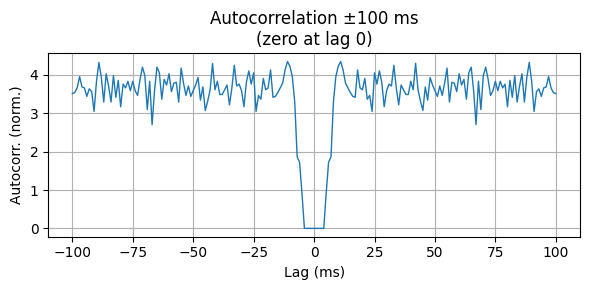

In [ ]:
max_lag_ms = 100               # ±100 ms window
max_lag_bins = int(max_lag_ms / (dt*1000))  # convert ms→bins
                                                    
#autocorrelation
acf_full = np.correlate(spikes_train, spikes_train, mode='full')
center = len(acf_full) // 2   # index corresponding to lag = 0
lags = np.arange(-max_lag_ms, max_lag_ms+1)   # in ms
acf_window = acf_full[
    center - max_lag_ms : center + max_lag_ms + 1]
acf_window[max_lag_ms] = 0

total_spikes = spikes_train.sum()
total_time_sec = len(spikes_train) * bin_size
rate_hz = total_spikes / total_time_sec

acf_norm = acf_window / rate_hz

plt.figure(figsize=(6,3))
plt.plot(lags, acf_norm, lw=1)
plt.xlabel("Lag (ms)")
plt.ylabel("Autocorr. (norm.)")
plt.title("Autocorrelation ±100 ms\n(zero at lag 0)")
plt.grid(True)
plt.tight_layout()
plt.show()


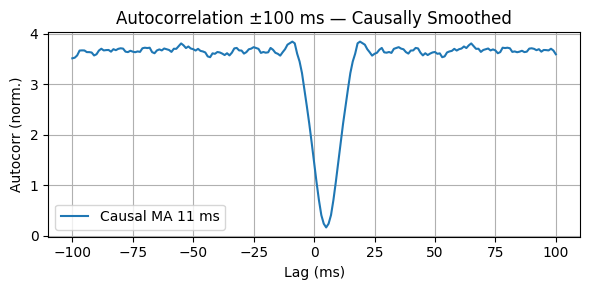

In [ ]:
window_ms   = 11                # causal window length in ms
window_bins = window_ms         # since dt = 1 ms/bin

smoothed_acf = np.zeros_like(acf_norm)
for i in range(len(acf_norm)):
    # average over [i-window_bins+1 ... i], but not before index 0
    start = max(0, i - window_bins + 1)
    smoothed_acf[i] = np.mean(acf_norm[start : i+1])

plt.figure(figsize=(6,3))
plt.plot(lags, smoothed_acf, label=f"Causal MA {window_ms} ms")
plt.xlabel("Lag (ms)")
plt.ylabel("Autocorr (norm.)")
plt.title("Autocorrelation ±100 ms — Causally Smoothed")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


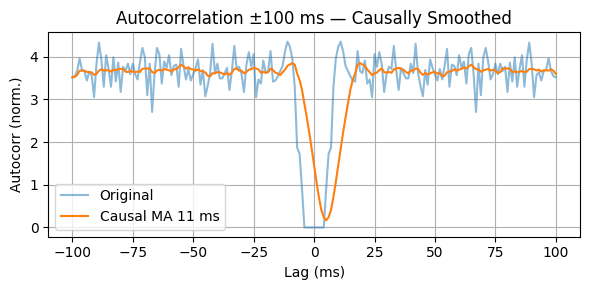

In [72]:
plt.figure(figsize=(6,3))
plt.plot(lags, acf_norm,   label="Original", alpha=0.5)
plt.plot(lags, smoothed_acf, label=f"Causal MA {window_ms} ms")
plt.xlabel("Lag (ms)")
plt.ylabel("Autocorr (norm.)")
plt.title("Autocorrelation ±100 ms — Causally Smoothed")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()